In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
from LCA_urine_model import LCA_urine_model
from logistics_model import logistics_model

In [3]:
n_regen = 20
n_collection = 1

In [4]:
Logistics = logistics_model('..\shapefiles\\building_block_people_WGS_2.csv', n_regen, n_collection)
distance_regeneration, distance_collection = Logistics.logistics_distances()

In [42]:
Total_Energy = pd.DataFrame()
Total_GHG = pd.DataFrame()
for index, row in distance_regeneration.iterrows():
    number_of_houses_per_facility= row['num_people']
    distance_regen = row['total_dist_m']/1000
    ENERGY, GHG = LCA_urine_model(number_of_houses_per_facility, distance_regen, distance_collection)
    Total_Energy=Total_Energy.append(ENERGY)
    Total_GHG=Total_GHG.append(GHG)

In [67]:
Total_Energy_all

,Resin manufacturing,Resin transport,Catridge manufacturing,Catridge transport,Tank manufacturing,Tank transport,Pump operation,Pump manufacturing,Pump transport,Acid manufacturing,Acid transport,Logistics_regen,Logistics_collect
0,0.159697,0.000027,0.07004,0.000005,0.000078,0.000011,4.758541e-08,0.311487,0.000011,0.017997,0.000266,0.026233,3.593176


In [70]:
Total_Energy_all = Total_Energy.sum()
Total_Energy_all=pd.DataFrame(Total_Energy_all).T
Total_GHG_all = Total_GHG.sum()
Total_GHG_all=pd.DataFrame(Total_GHG_all).T

ValueError: labels [ 3.59317587] not contained in axis

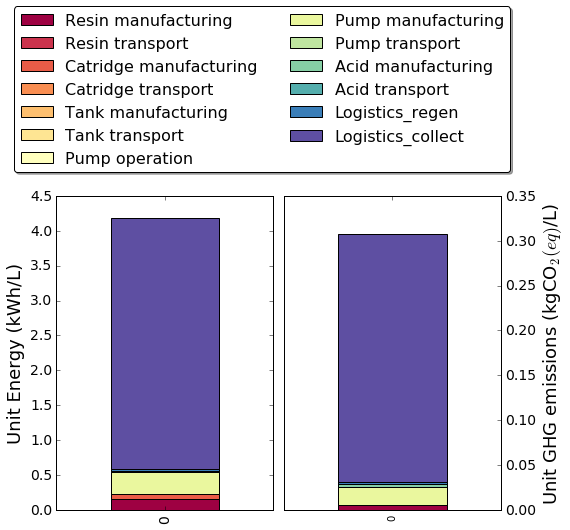

In [65]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1,2, 1)
a=Total_Energy_all.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='Spectral')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Unit Energy (kWh/L)',fontsize=18)
ax = fig.add_subplot(1,2, 2)
b=Total_GHG_all.plot(kind='bar', stacked = True, secondary_y=True, ax=ax, legend=False,colormap='Spectral')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Unit GHG emissions (kgCO$_2(eq)$/L)',fontsize=18)
b.legend(loc='lower center', bbox_to_anchor=(-0.1, 1.05),ncol=2, fancybox=True, shadow=True,fontsize=16)
fig.tight_layout()